Варіант 3

Контекст:

Ваш набір даних містить список відеоігор, продажі яких перевищують 100 000 копій. Він був згенерований шляхом парсингу vgchartz.com.

Поля включають:
•	Rank - Рейтинг загальних продажів
•	Name - назва гри
•	Platform - платформа випуску ігор (наприклад, ПК, PS4 тощо)
•	Year - рік виходу гри
•	Genre - жанр гри
•	Publisher - видавець гри
•	NA_Sales - Продажі в Північній Америці (у мільйонах)
•	EU_Sales - Продажі в Європі (у мільйонах)
•	JP_Sales - Продажі в Японії (мільйони)
•	Other_Sales - Продажі в решті світу (у мільйонах)
•	Global_Sales - загальний обсяг продажів у всьому світі.
Завдання:
1.	Завантажте дані у проект
2.	Зробіть перевірку даних на консистентність та обробіть пропуски, якщо вони є (дроп або заміна даних)
3.	Зробіть розвідувальний аналіз даних:
a.	Побудуйте графік топ-10 жанрів за кількістю ігор
b.	Знайдіть топ-10 видавців ігор, які заробили найбільше грошей
c.	Знайдіть топ-10 жанрів, які дали найбільші продажи у Північній Америці та Європі за період з 2000 по 2010 роки.


In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('vgsales.csv')
df.columns = [column.lower().replace("-", "_").replace(" ", "_") for column in df.columns]

In [7]:
df_clean = df[df.year != "N/A"]

In [17]:
df_task_a = df_clean.groupby("genre")['genre'].agg(['count']).sort_values(["count"],ascending=False).reset_index().head(10)

In [18]:
display(df_task_a)

,genre,count
0,Action,3316
1,Sports,2345
2,Misc,1739
3,Role-Playing,1488
4,Shooter,1310
5,Adventure,1286
6,Racing,1249
7,Platform,886
8,Simulation,867
9,Fighting,848


<AxesSubplot:xlabel='genre', ylabel='count'>

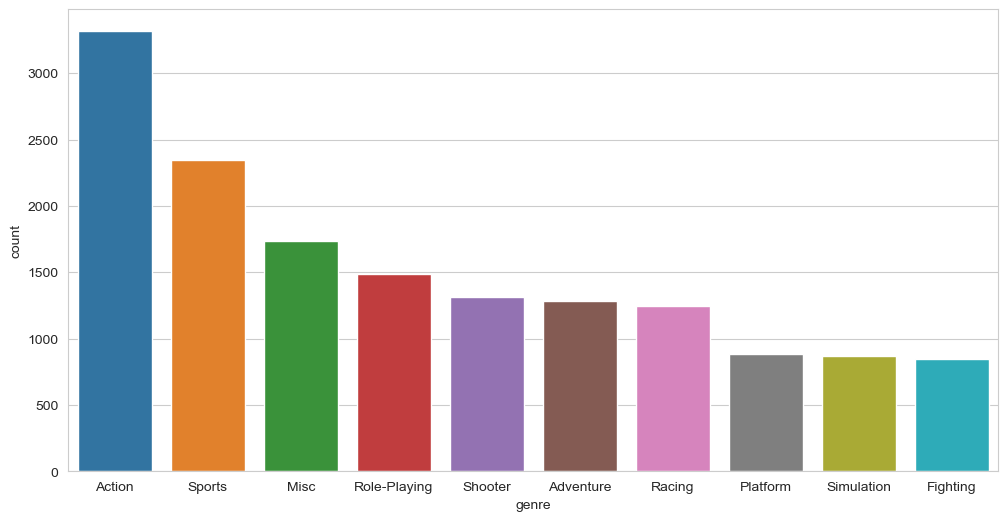

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=df_task_a, x="genre", y="count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [25]:
df_task_b = df_clean.groupby("publisher")['global_sales'].agg(['sum']).sort_values(["sum"],ascending=False).reset_index().head(10)

In [26]:
display(df_task_b)

,publisher,sum
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72
5,Take-Two Interactive,399.54
6,THQ,340.77
7,Konami Digital Entertainment,283.64
8,Sega,272.99
9,Namco Bandai Games,254.09


[Text(0, 0, 'Nintendo'),
 Text(1, 0, 'Electronic Arts'),
 Text(2, 0, 'Activision'),
 Text(3, 0, 'Sony Computer Entertainment'),
 Text(4, 0, 'Ubisoft'),
 Text(5, 0, 'Take-Two Interactive'),
 Text(6, 0, 'THQ'),
 Text(7, 0, 'Konami Digital Entertainment'),
 Text(8, 0, 'Sega'),
 Text(9, 0, 'Namco Bandai Games')]

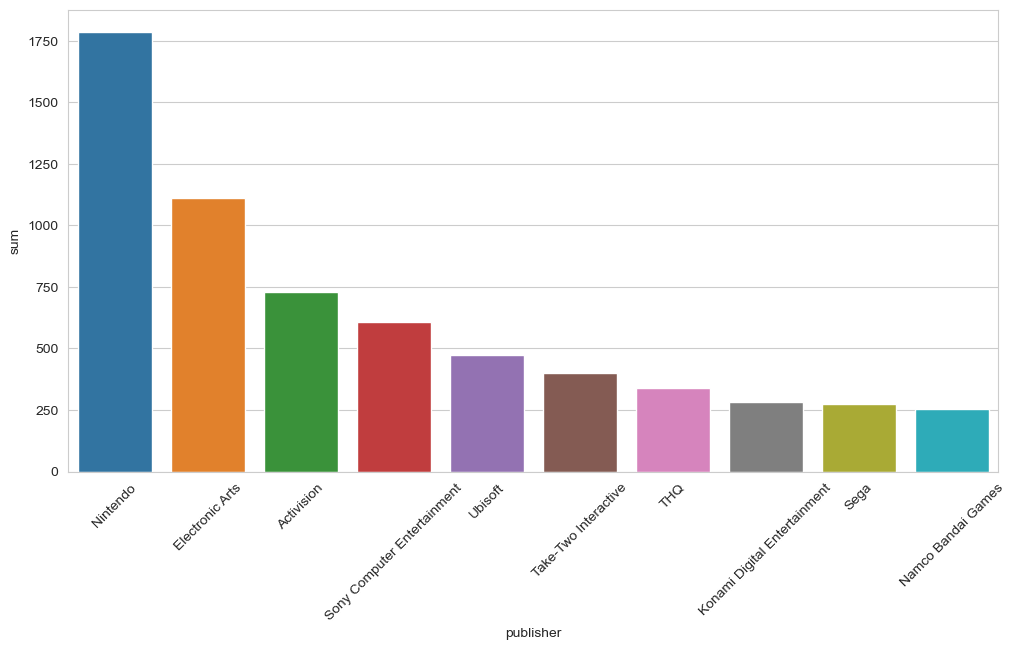

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=df_task_b, x="publisher", y="sum")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [62]:
df_task_c = df_clean[(df_clean.year >= 2000) & (df_clean.year <= 2010)].groupby("genre")[['eu_sales','na_sales']].agg(['sum']).reset_index().head(10)
df_task_c.columns = ['genre','eu_sum', 'na_sum']

In [63]:
df_task_c

,genre,eu_sum,na_sum
0,Action,271.55,523.44
1,Adventure,36.24,68.34
2,Fighting,58.86,129.52
3,Misc,159.05,297.90
4,Platform,111.14,220.79
5,Puzzle,36.92,62.19
6,Racing,152.85,241.02
7,Role-Playing,94.97,199.74
8,Shooter,147.41,301.03
9,Simulation,86.12,148.09


In [64]:
df_task_c['sum'] = df_task_c['eu_sum'] + df_task_c['na_sum']
df_task_c = df_task_c.drop(columns=['eu_sum', 'na_sum']).sort_values(['sum'], ascending=False)

In [65]:
df_task_c

,genre,sum
0,Action,794.99
3,Misc,456.95
8,Shooter,448.44
6,Racing,393.87
4,Platform,331.93
7,Role-Playing,294.71
9,Simulation,234.21
2,Fighting,188.38
1,Adventure,104.58
5,Puzzle,99.11


[Text(0, 0, 'Action'),
 Text(1, 0, 'Misc'),
 Text(2, 0, 'Shooter'),
 Text(3, 0, 'Racing'),
 Text(4, 0, 'Platform'),
 Text(5, 0, 'Role-Playing'),
 Text(6, 0, 'Simulation'),
 Text(7, 0, 'Fighting'),
 Text(8, 0, 'Adventure'),
 Text(9, 0, 'Puzzle')]

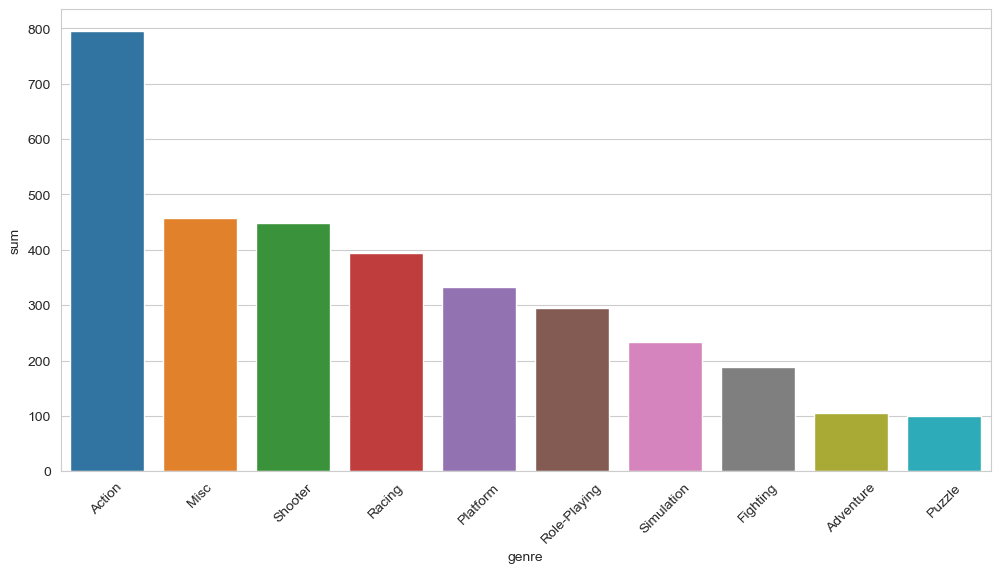

In [66]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=df_task_c, x="genre", y="sum")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)